In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
files = ["../Raman/climate_data_"+str(i)+".csv" for i in range(660)]
df = pd.concat([pd.read_csv(f, index_col=0) for f in files])
print("Complete Data", len(df)) #Net Data
#Drop NA rows
df = df.dropna().reset_index(drop=True)
print("Data after droping Na", len(df))

Complete Data 68078
Data after droping Na 62319


In [3]:
import ee
ee.Authenticate()
ee.Initialize(project='ee-anaad')

In [4]:
district_boundaries = ee.FeatureCollection('projects/ee-anaad/assets/India_district_boundaries')
aez_boundaries = ee.FeatureCollection('projects/ee-anaad/assets/India_AEZ_boundaries')
block_boundaries = ee.FeatureCollection('projects/ee-anaad/assets/AEZ_mapped_block_boundaries')
blocks = block_boundaries.filter(ee.Filter.eq('aez_id', 12))
blocks_list = blocks.toList(blocks.size().getInfo())
info = blocks_list.map(lambda x: ee.Feature(x).toDictionary())
block_df = pd.DataFrame.from_records(info.getInfo())
block_df = block_df[["District N", "District c", "Subdistric", "Subdistr_1"]]
copy_groupby = block_df.groupby(["District N",  "Subdistric"]).size().reset_index().rename(columns={0:"count"})
copies = copy_groupby[copy_groupby["count"]>1].reset_index(drop=True)
copies

,District N,Subdistric,count
0,balangir,Bangomunda,2
1,cuttack,Choudwar,2
2,cuttack,Kanpur,2
3,dakshin bastar dantewada,Chhindgarh,2
4,ganjam,SERAGAD,2
5,malkangiri,Chitrakonda,2
6,vizianagaram,Balijipeta,2


In [5]:
#remove these district data from original data
for i in range(len(copies)):
    district = copies.iloc[i]["District N"]
    subdistrict = copies.iloc[i]["Subdistric"]
    df = df[~((df["District N_roi"]==district) & (df["Subdistric_roi"]==subdistrict))]
print("Number of rows", len(df))
print("Number of blocks", 631-14)

Number of rows 61758
Number of blocks 617


In [6]:
print("Number with pixels >= 1", len(df[df["num_fire"]>=1]))
print("Number with pixels >= 2", len(df[df["num_fire"]>=2]))
print("Number with pixels >= 3", len(df[df["num_fire"]>=3]))
print("Number with pixels >= 4", len(df[df["num_fire"]>=4]))
print("Number with pixels >= 5", len(df[df["num_fire"]>=5]))
print("Number with pixels >= 10", len(df[df["num_fire"]>=10]))
print("Number with pixels >= 20", len(df[df["num_fire"]>=20]))
print("Number with pixels >= 30", len(df[df["num_fire"]>=30]))
print("Number with pixels >= 40", len(df[df["num_fire"]>=40]))
print("Number with pixels >= 50", len(df[df["num_fire"]>=50]))

Number with pixels >= 1 15069
Number with pixels >= 2 11204
Number with pixels >= 3 8774
Number with pixels >= 4 7284
Number with pixels >= 5 6164
Number with pixels >= 10 3335
Number with pixels >= 20 1588
Number with pixels >= 30 931
Number with pixels >= 40 617
Number with pixels >= 50 427


In [7]:
area_list = blocks_list.map(lambda x: ee.List([ee.Feature(x).geometry().area(), ee.Feature(x).get("Subdistric")])).getInfo()
print("Average area of blocks", sum([i[0] for i in area_list])/blocks_list.size().getInfo()/1e6)

Average area of blocks 290.8191213533091


In [8]:
df[df["num_fire"]>1][["num_fire", "Subdistric_roi", "District N_roi"]].groupby(["District N_roi", "Subdistric_roi"]).size().reset_index().rename(columns={0:"count"}).sort_values(by="count", ascending=False).reset_index(drop=True)

,District N_roi,Subdistric_roi,count
0,jajapur,Kalinganagar,94
1,saraikela-kharsawan,Adityapur(Gamharia),88
2,dhenkanal,Bhusan Steel Limited,86
3,anugul,Talcher Sadar,85
4,sundargarh,Hemgir,77
5,anugul,Kaniha,74
6,jharsuguda,Lakhanpur,72
7,dhanbad,Baghmara-Cum-Katras,71
8,jajapur,Jakhapura,71
9,dhanbad,Gobindpur,71


In [9]:
data_df = pd.concat([df[df["num_fire"]>=5], df[df["num_fire"]==0].sample(frac=0.3)], ignore_index=True)
data_df["GT"] = data_df["num_fire"].apply(lambda x: x>0).astype(int)

In [41]:
average_columns = [i+"_average_0" for i in columns] + [i+"_average_1" for i in columns] + [i+"_average_2" for i in columns]
sum_columns = [i+"_sum_0" for i in columns] + [i+"_sum_1" for i in columns] + [i+"_sum_2" for i in columns]
max_columns = [i+"_max_0" for i in columns] + [i+"_max_1" for i in columns] + [i+"_max_2" for i in columns]
min_columns = [i+"_min_0" for i in columns] + [i+"_min_1" for i in columns] + [i+"_min_2" for i in columns]
feature_columns =  average_columns + sum_columns + max_columns + min_columns# + ["ADI 2019_roi", "month"]

In [42]:
data_df["month"] = [i.split("-")[1] for i in list(data_df["date"])]

In [43]:
data_df[:100]

,num_fire,Albedo_inst_average_0,AvgSurfT_inst_average_0,CanopInt_inst_average_0,ECanop_tavg_average_0,ESoil_tavg_average_0,Evap_tavg_average_0,LWdown_f_tavg_average_0,Lwnet_tavg_average_0,PotEvap_tavg_average_0,Psurf_f_inst_average_0,Qair_f_inst_average_0,Qg_tavg_average_0,Qh_tavg_average_0,Qle_tavg_average_0,Qs_acc_average_0,Qsb_acc_average_0,Qsm_acc_average_0,Rainf_f_tavg_average_0,Rainf_tavg_average_0,RootMoist_inst_average_0,SWE_inst_average_0,SWdown_f_tavg_average_0,SnowDepth_inst_average_0,Snowf_tavg_average_0,SoilMoi0_10cm_inst_average_0,SoilMoi100_200cm_inst_average_0,SoilMoi10_40cm_inst_average_0,SoilMoi40_100cm_inst_average_0,SoilTMP0_10cm_inst_average_0,SoilTMP100_200cm_inst_average_0,SoilTMP10_40cm_inst_average_0,SoilTMP40_100cm_inst_average_0,Swnet_tavg_average_0,Tair_f_inst_average_0,Tveg_tavg_average_0,Wind_f_inst_average_0,Albedo_inst_average_1,AvgSurfT_inst_average_1,CanopInt_inst_average_1,ECanop_tavg_average_1,ESoil_tavg_average_1,Evap_tavg_average_1,LWdown_f_tavg_average_1,Lwnet_tavg_average_1,PotEvap_tavg_average_1,Psurf_f_inst_average_1,Qair_f_inst_average_1,Qg_tavg_average_1,Qh_tavg_average_1,Qle_tavg_average_1,Qs_acc_average_1,Qsb_acc_average_1,Qsm_acc_average_1,Rainf_f_tavg_average_1,Rainf_tavg_average_1,RootMoist_inst_average_1,SWE_inst_average_1,SWdown_f_tavg_average_1,SnowDepth_inst_average_1,Snowf_tavg_average_1,SoilMoi0_10cm_inst_average_1,SoilMoi100_200cm_inst_average_1,SoilMoi10_40cm_inst_average_1,SoilMoi40_100cm_inst_average_1,SoilTMP0_10cm_inst_average_1,SoilTMP100_200cm_inst_average_1,SoilTMP10_40cm_inst_average_1,SoilTMP40_100cm_inst_average_1,Swnet_tavg_average_1,Tair_f_inst_average_1,Tveg_tavg_average_1,Wind_f_inst_average_1,Albedo_inst_average_2,AvgSurfT_inst_average_2,CanopInt_inst_average_2,ECanop_tavg_average_2,ESoil_tavg_average_2,Evap_tavg_average_2,LWdown_f_tavg_average_2,Lwnet_tavg_average_2,PotEvap_tavg_average_2,Psurf_f_inst_average_2,Qair_f_inst_average_2,Qg_tavg_average_2,Qh_tavg_average_2,Qle_tavg_average_2,Qs_acc_average_2,Qsb_acc_average_2,Qsm_acc_average_2,Rainf_f_tavg_average_2,Rainf_tavg_average_2,RootMoist_inst_average_2,SWE_inst_average_2,SWdown_f_tavg_average_2,SnowDepth_inst_average_2,Snowf_tavg_average_2,SoilMoi0_10cm_inst_average_2,SoilMoi100_200cm_inst_average_2,SoilMoi10_40cm_inst_average_2,SoilMoi40_100cm_inst_average_2,SoilTMP0_10cm_inst_average_2,SoilTMP100_200cm_inst_average_2,SoilTMP10_40cm_inst_average_2,SoilTMP40_100cm_inst_average_2,Swnet_tavg_average_2,Tair_f_inst_average_2,Tveg_tavg_average_2,Wind_f_inst_average_2,date,Albedo_inst_max_0,AvgSurfT_inst_max_0,CanopInt_inst_max_0,ECanop_tavg_max_0,ESoil_tavg_max_0,Evap_tavg_max_0,LWdown_f_tavg_max_0,Lwnet_tavg_max_0,PotEvap_tavg_max_0,Psurf_f_inst_max_0,Qair_f_inst_max_0,Qg_tavg_max_0,Qh_tavg_max_0,Qle_tavg_max_0,Qs_acc_max_0,Qsb_acc_max_0,Qsm_acc_max_0,Rainf_f_tavg_max_0,Rainf_tavg_max_0,RootMoist_inst_max_0,SWE_inst_max_0,SWdown_f_tavg_max_0,SnowDepth_inst_max_0,Snowf_tavg_max_0,SoilMoi0_10cm_inst_max_0,SoilMoi100_200cm_inst_max_0,SoilMoi10_40cm_inst_max_0,SoilMoi40_100cm_inst_max_0,SoilTMP0_10cm_inst_max_0,SoilTMP100_200cm_inst_max_0,SoilTMP10_40cm_inst_max_0,SoilTMP40_100cm_inst_max_0,Swnet_tavg_max_0,Tair_f_inst_max_0,Tveg_tavg_max_0,Wind_f_inst_max_0,Albedo_inst_max_1,AvgSurfT_inst_max_1,CanopInt_inst_max_1,ECanop_tavg_max_1,ESoil_tavg_max_1,Evap_tavg_max_1,LWdown_f_tavg_max_1,Lwnet_tavg_max_1,PotEvap_tavg_max_1,Psurf_f_inst_max_1,Qair_f_inst_max_1,Qg_tavg_max_1,Qh_tavg_max_1,Qle_tavg_max_1,Qs_acc_max_1,Qsb_acc_max_1,Qsm_acc_max_1,Rainf_f_tavg_max_1,Rainf_tavg_max_1,RootMoist_inst_max_1,SWE_inst_max_1,SWdown_f_tavg_max_1,SnowDepth_inst_max_1,Snowf_tavg_max_1,SoilMoi0_10cm_inst_max_1,SoilMoi100_200cm_inst_max_1,SoilMoi10_40cm_inst_max_1,SoilMoi40_100cm_inst_max_1,SoilTMP0_10cm_inst_max_1,SoilTMP100_200cm_inst_max_1,SoilTMP10_40cm_inst_max_1,SoilTMP40_100cm_inst_max_1,Swnet_tavg_max_1,Tair_f_inst_max_1,Tveg_tavg_max_1,Wind_f_inst_max_1,Albedo_inst_max_2,AvgSurfT_inst_max_2,CanopInt_inst_max_2,ECanop_tav

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
X = data_df[feature_columns]
Y = data_df['GT']
X.head(10)


,Albedo_inst_average_0,AvgSurfT_inst_average_0,CanopInt_inst_average_0,ECanop_tavg_average_0,ESoil_tavg_average_0,Evap_tavg_average_0,LWdown_f_tavg_average_0,Lwnet_tavg_average_0,PotEvap_tavg_average_0,Psurf_f_inst_average_0,Qair_f_inst_average_0,Qg_tavg_average_0,Qh_tavg_average_0,Qle_tavg_average_0,Qs_acc_average_0,Qsb_acc_average_0,Qsm_acc_average_0,Rainf_f_tavg_average_0,Rainf_tavg_average_0,RootMoist_inst_average_0,SWE_inst_average_0,SWdown_f_tavg_average_0,SnowDepth_inst_average_0,Snowf_tavg_average_0,SoilMoi0_10cm_inst_average_0,SoilMoi100_200cm_inst_average_0,SoilMoi10_40cm_inst_average_0,SoilMoi40_100cm_inst_average_0,SoilTMP0_10cm_inst_average_0,SoilTMP100_200cm_inst_average_0,SoilTMP10_40cm_inst_average_0,SoilTMP40_100cm_inst_average_0,Swnet_tavg_average_0,Tair_f_inst_average_0,Tveg_tavg_average_0,Wind_f_inst_average_0,Albedo_inst_average_1,AvgSurfT_inst_average_1,CanopInt_inst_average_1,ECanop_tavg_average_1,ESoil_tavg_average_1,Evap_tavg_average_1,LWdown_f_tavg_average_1,Lwnet_tavg_average_1,PotEvap_tavg_average_1,Psurf_f_inst_average_1,Qair_f_inst_average_1,Qg_tavg_average_1,Qh_tavg_average_1,Qle_tavg_average_1,Qs_acc_average_1,Qsb_acc_average_1,Qsm_acc_average_1,Rainf_f_tavg_average_1,Rainf_tavg_average_1,RootMoist_inst_average_1,SWE_inst_average_1,SWdown_f_tavg_average_1,SnowDepth_inst_average_1,Snowf_tavg_average_1,SoilMoi0_10cm_inst_average_1,SoilMoi100_200cm_inst_average_1,SoilMoi10_40cm_inst_average_1,SoilMoi40_100cm_inst_average_1,SoilTMP0_10cm_inst_average_1,SoilTMP100_200cm_inst_average_1,SoilTMP10_40cm_inst_average_1,SoilTMP40_100cm_inst_average_1,Swnet_tavg_average_1,Tair_f_inst_average_1,Tveg_tavg_average_1,Wind_f_inst_average_1,Albedo_inst_average_2,AvgSurfT_inst_average_2,CanopInt_inst_average_2,ECanop_tavg_average_2,ESoil_tavg_average_2,Evap_tavg_average_2,LWdown_f_tavg_average_2,Lwnet_tavg_average_2,PotEvap_tavg_average_2,Psurf_f_inst_average_2,Qair_f_inst_average_2,Qg_tavg_average_2,Qh_tavg_average_2,Qle_tavg_average_2,Qs_acc_average_2,Qsb_acc_average_2,Qsm_acc_average_2,Rainf_f_tavg_average_2,Rainf_tavg_average_2,RootMoist_inst_average_2,SWE_inst_average_2,SWdown_f_tavg_average_2,SnowDepth_inst_average_2,Snowf_tavg_average_2,SoilMoi0_10cm_inst_average_2,SoilMoi100_200cm_inst_average_2,SoilMoi10_40cm_inst_average_2,SoilMoi40_100cm_inst_average_2,SoilTMP0_10cm_inst_average_2,SoilTMP100_200cm_inst_average_2,SoilTMP10_40cm_inst_average_2,SoilTMP40_100cm_inst_average_2,Swnet_tavg_average_2,Tair_f_inst_average_2,Tveg_tavg_average_2,Wind_f_inst_average_2,Albedo_inst_sum_0,AvgSurfT_inst_sum_0,CanopInt_inst_sum_0,ECanop_tavg_sum_0,ESoil_tavg_sum_0,Evap_tavg_sum_0,LWdown_f_tavg_sum_0,Lwnet_tavg_sum_0,PotEvap_tavg_sum_0,Psurf_f_inst_sum_0,Qair_f_inst_sum_0,Qg_tavg_sum_0,Qh_tavg_sum_0,Qle_tavg_sum_0,Qs_acc_sum_0,Qsb_acc_sum_0,Qsm_acc_sum_0,Rainf_f_tavg_sum_0,Rainf_tavg_sum_0,RootMoist_inst_sum_0,SWE_inst_sum_0,SWdown_f_tavg_sum_0,SnowDepth_inst_sum_0,Snowf_tavg_sum_0,SoilMoi0_10cm_inst_sum_0,SoilMoi100_200cm_inst_sum_0,SoilMoi10_40cm_inst_sum_0,SoilMoi40_100cm_inst_sum_0,SoilTMP0_10cm_inst_sum_0,SoilTMP100_200cm_inst_sum_0,SoilTMP10_40cm_inst_sum_0,SoilTMP40_100cm_inst_sum_0,Swnet_tavg_sum_0,Tair_f_inst_sum_0,Tveg_tavg_sum_0,Wind_f_inst_sum_0,Albedo_inst_sum_1,AvgSurfT_inst_sum_1,CanopInt_inst_sum_1,ECanop_tavg_sum_1,ESoil_tavg_sum_1,Evap_tavg_sum_1,LWdown_f_tavg_sum_1,Lwnet_tavg_sum_1,PotEvap_tavg_sum_1,Psurf_f_inst_sum_1,Qair_f_inst_sum_1,Qg_tavg_sum_1,Qh_tavg_sum_1,Qle_tavg_sum_1,Qs_acc_sum_1,Qsb_acc_sum_1,Qsm_acc_sum_1,Rainf_f_tavg_sum_1,Rainf_tavg_sum_1,RootMoist_inst_sum_1,SWE_inst_sum_1,SWdown_f_tavg_sum_1,SnowDepth_inst_sum_1,Snowf_tavg_sum_1,SoilMoi0_10cm_inst_sum_1,SoilMoi100_200cm_inst_sum_1,SoilMoi10_40cm_inst_sum_1,SoilMoi40_100cm_inst_sum_1,SoilTMP0_10cm_inst_sum_1,SoilTMP100_200cm_inst_sum_1,SoilTMP10_40cm_inst_sum_1,SoilTMP40_100cm_inst_sum_1,Swnet_tavg_sum_1,Tair_f_inst_sum_1,Tveg_tavg_sum_1,Wind_f_inst_sum_1,Albedo_inst_sum_2,AvgSurfT_inst_sum_2,CanopInt_inst_sum_2,ECanop_tavg_sum_2,ESoil_

In [45]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.3)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
clf.predict(x_test)
clf.score(x_test,y_test)

0.4080043617286051

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)
clf.predict(x_test)
clf.score(x_test,y_test)

/Users/raman/Desktop/Projects/ACT4D/anaconda3/envs/fire/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8053024026512013

In [47]:
len(data_df[data_df["GT"]>0]), len(data_df[data_df["GT"]==0])

(6164, 13952)

In [48]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
clf.predict(x_test)
clf.score(x_test,y_test)

0.8415907207953603

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test = clf.predict(x_test)
accuracy_score(y_test, y_pred_test)

0.8415907207953603

In [50]:
confusion_matrix(y_test, y_pred_test)

array([[3761,  422],
       [ 534, 1318]])

In [51]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4183
           1       0.76      0.71      0.73      1852

    accuracy                           0.84      6035
   macro avg       0.82      0.81      0.81      6035
weighted avg       0.84      0.84      0.84      6035



In [52]:
array = clf.predict(x_test)
len(array[array==1])

1740

In [53]:
len(array[array==0])

4295

In [54]:
import numpy as np
array = np.array(list(y_test))
len(array[array==1])

1852

In [55]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

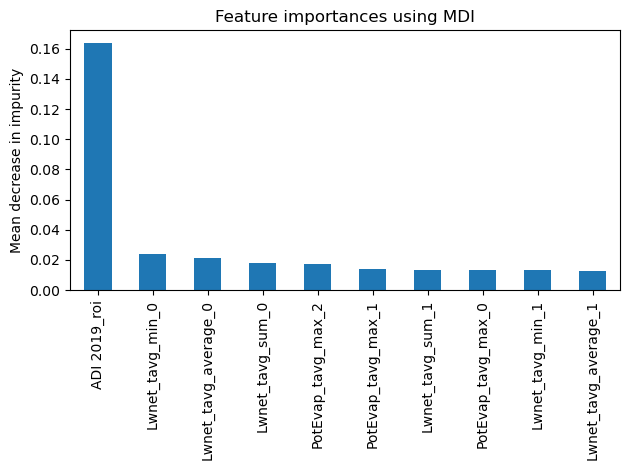

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_columns).sort_values(ascending=False)[:10]

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [56]:
pd.Series(importances, index=feature_columns).sort_values(ascending=False)

Lwnet_tavg_min_0                   0.038295
Lwnet_tavg_sum_0                   0.035522
Lwnet_tavg_average_0               0.021283
Qh_tavg_max_0                      0.019342
Lwnet_tavg_min_1                   0.019095
AvgSurfT_inst_max_0                0.016640
Qh_tavg_average_1                  0.015480
PotEvap_tavg_max_0                 0.013503
Lwnet_tavg_average_1               0.012368
Qh_tavg_sum_0                      0.011847
Lwnet_tavg_sum_1                   0.011379
AvgSurfT_inst_max_1                0.010724
Qh_tavg_average_0                  0.010485
Qsb_acc_average_1                  0.009779
Qh_tavg_max_2                      0.009738
Qh_tavg_average_2                  0.009194
Qsb_acc_max_0                      0.008723
PotEvap_tavg_max_1                 0.008484
Lwnet_tavg_min_2                   0.008322
Qh_tavg_max_1                      0.007937
Lwnet_tavg_average_2               0.007890
Qsb_acc_average_2                  0.007371
Evap_tavg_max_1                 

In [ ]:
len(pd.Series(importances, index=feature_columns).sort_values(ascending=False))

433

In [ ]:
blocks_list.size().getInfo()

631

In [10]:
lst = ['Albedo_inst_average_0',
 'AvgSurfT_inst_average_0',
 'CanopInt_inst_average_0',
 'ECanop_tavg_average_0',
 'ESoil_tavg_average_0',
 'Evap_tavg_average_0',
 'LWdown_f_tavg_average_0',
 'Lwnet_tavg_average_0',
 'PotEvap_tavg_average_0',
 'Psurf_f_inst_average_0',
 'Qair_f_inst_average_0',
 'Qg_tavg_average_0',
 'Qh_tavg_average_0',
 'Qle_tavg_average_0',
 'Qs_acc_average_0',
 'Qsb_acc_average_0',
 'Qsm_acc_average_0',
 'Rainf_f_tavg_average_0',
 'Rainf_tavg_average_0',
 'RootMoist_inst_average_0',
 'SWE_inst_average_0',
 'SWdown_f_tavg_average_0',
 'SnowDepth_inst_average_0',
 'Snowf_tavg_average_0',
 'SoilMoi0_10cm_inst_average_0',
 'SoilMoi100_200cm_inst_average_0',
 'SoilMoi10_40cm_inst_average_0',
 'SoilMoi40_100cm_inst_average_0',
 'SoilTMP0_10cm_inst_average_0',
 'SoilTMP100_200cm_inst_average_0',
 'SoilTMP10_40cm_inst_average_0',
 'SoilTMP40_100cm_inst_average_0',
 'Swnet_tavg_average_0',
 'Tair_f_inst_average_0',
 'Tveg_tavg_average_0',
 'Wind_f_inst_average_0']

In [11]:
columns = [i[:-10] for i in lst]

In [ ]:
df

,num_fire,Albedo_inst_average_0,AvgSurfT_inst_average_0,CanopInt_inst_average_0,ECanop_tavg_average_0,ESoil_tavg_average_0,Evap_tavg_average_0,LWdown_f_tavg_average_0,Lwnet_tavg_average_0,PotEvap_tavg_average_0,Psurf_f_inst_average_0,Qair_f_inst_average_0,Qg_tavg_average_0,Qh_tavg_average_0,Qle_tavg_average_0,Qs_acc_average_0,Qsb_acc_average_0,Qsm_acc_average_0,Rainf_f_tavg_average_0,Rainf_tavg_average_0,RootMoist_inst_average_0,SWE_inst_average_0,SWdown_f_tavg_average_0,SnowDepth_inst_average_0,Snowf_tavg_average_0,SoilMoi0_10cm_inst_average_0,SoilMoi100_200cm_inst_average_0,SoilMoi10_40cm_inst_average_0,SoilMoi40_100cm_inst_average_0,SoilTMP0_10cm_inst_average_0,SoilTMP100_200cm_inst_average_0,SoilTMP10_40cm_inst_average_0,SoilTMP40_100cm_inst_average_0,Swnet_tavg_average_0,Tair_f_inst_average_0,Tveg_tavg_average_0,Wind_f_inst_average_0,Albedo_inst_average_1,AvgSurfT_inst_average_1,CanopInt_inst_average_1,ECanop_tavg_average_1,ESoil_tavg_average_1,Evap_tavg_average_1,LWdown_f_tavg_average_1,Lwnet_tavg_average_1,PotEvap_tavg_average_1,Psurf_f_inst_average_1,Qair_f_inst_average_1,Qg_tavg_average_1,Qh_tavg_average_1,Qle_tavg_average_1,Qs_acc_average_1,Qsb_acc_average_1,Qsm_acc_average_1,Rainf_f_tavg_average_1,Rainf_tavg_average_1,RootMoist_inst_average_1,SWE_inst_average_1,SWdown_f_tavg_average_1,SnowDepth_inst_average_1,Snowf_tavg_average_1,SoilMoi0_10cm_inst_average_1,SoilMoi100_200cm_inst_average_1,SoilMoi10_40cm_inst_average_1,SoilMoi40_100cm_inst_average_1,SoilTMP0_10cm_inst_average_1,SoilTMP100_200cm_inst_average_1,SoilTMP10_40cm_inst_average_1,SoilTMP40_100cm_inst_average_1,Swnet_tavg_average_1,Tair_f_inst_average_1,Tveg_tavg_average_1,Wind_f_inst_average_1,Albedo_inst_average_2,AvgSurfT_inst_average_2,CanopInt_inst_average_2,ECanop_tavg_average_2,ESoil_tavg_average_2,Evap_tavg_average_2,LWdown_f_tavg_average_2,Lwnet_tavg_average_2,PotEvap_tavg_average_2,Psurf_f_inst_average_2,Qair_f_inst_average_2,Qg_tavg_average_2,Qh_tavg_average_2,Qle_tavg_average_2,Qs_acc_average_2,Qsb_acc_average_2,Qsm_acc_average_2,Rainf_f_tavg_average_2,Rainf_tavg_average_2,RootMoist_inst_average_2,SWE_inst_average_2,SWdown_f_tavg_average_2,SnowDepth_inst_average_2,Snowf_tavg_average_2,SoilMoi0_10cm_inst_average_2,SoilMoi100_200cm_inst_average_2,SoilMoi10_40cm_inst_average_2,SoilMoi40_100cm_inst_average_2,SoilTMP0_10cm_inst_average_2,SoilTMP100_200cm_inst_average_2,SoilTMP10_40cm_inst_average_2,SoilTMP40_100cm_inst_average_2,Swnet_tavg_average_2,Tair_f_inst_average_2,Tveg_tavg_average_2,Wind_f_inst_average_2,date,Albedo_inst_max_0,AvgSurfT_inst_max_0,CanopInt_inst_max_0,ECanop_tavg_max_0,ESoil_tavg_max_0,Evap_tavg_max_0,LWdown_f_tavg_max_0,Lwnet_tavg_max_0,PotEvap_tavg_max_0,Psurf_f_inst_max_0,Qair_f_inst_max_0,Qg_tavg_max_0,Qh_tavg_max_0,Qle_tavg_max_0,Qs_acc_max_0,Qsb_acc_max_0,Qsm_acc_max_0,Rainf_f_tavg_max_0,Rainf_tavg_max_0,RootMoist_inst_max_0,SWE_inst_max_0,SWdown_f_tavg_max_0,SnowDepth_inst_max_0,Snowf_tavg_max_0,SoilMoi0_10cm_inst_max_0,SoilMoi100_200cm_inst_max_0,SoilMoi10_40cm_inst_max_0,SoilMoi40_100cm_inst_max_0,SoilTMP0_10cm_inst_max_0,SoilTMP100_200cm_inst_max_0,SoilTMP10_40cm_inst_max_0,SoilTMP40_100cm_inst_max_0,Swnet_tavg_max_0,Tair_f_inst_max_0,Tveg_tavg_max_0,Wind_f_inst_max_0,Albedo_inst_max_1,AvgSurfT_inst_max_1,CanopInt_inst_max_1,ECanop_tavg_max_1,ESoil_tavg_max_1,Evap_tavg_max_1,LWdown_f_tavg_max_1,Lwnet_tavg_max_1,PotEvap_tavg_max_1,Psurf_f_inst_max_1,Qair_f_inst_max_1,Qg_tavg_max_1,Qh_tavg_max_1,Qle_tavg_max_1,Qs_acc_max_1,Qsb_acc_max_1,Qsm_acc_max_1,Rainf_f_tavg_max_1,Rainf_tavg_max_1,RootMoist_inst_max_1,SWE_inst_max_1,SWdown_f_tavg_max_1,SnowDepth_inst_max_1,Snowf_tavg_max_1,SoilMoi0_10cm_inst_max_1,SoilMoi100_200cm_inst_max_1,SoilMoi10_40cm_inst_max_1,SoilMoi40_100cm_inst_max_1,SoilTMP0_10cm_inst_max_1,SoilTMP100_200cm_inst_max_1,SoilTMP10_40cm_inst_max_1,SoilTMP40_100cm_inst_max_1,Swnet_tavg_max_1,Tair_f_inst_max_1,Tveg_tavg_max_1,Wind_f_inst_max_1,Albedo_inst_max_2,AvgSurfT_inst_max_2,CanopInt_inst_max_2,ECanop_tav